### Importação das bibliotecas

In [1]:
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import pandas as pd
import folium
import os

### Leitura dos datasets

In [2]:
paths = [
    'data/Chicago_Crimes_2001_to_2004.csv',
    'data/Chicago_Crimes_2005_to_2007.csv',
    'data/Chicago_Crimes_2008_to_2011.csv',
    'data/Chicago_Crimes_2012_to_2017.csv'
]
dfs = []
for p in paths:
    if not os.path.exists(p):
        raise FileNotFoundError(f"Arquivo não encontrado: {p}")
    # parse_dates para otimizar extração de features de tempo
    df_temp = pd.read_csv(p, parse_dates=['Date'], on_bad_lines='skip')
    if 'Unnamed: 0' in df_temp.columns:
        df_temp = df_temp.drop(columns=['Unnamed: 0'])
    dfs.append(df_temp)
    
df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_30267/3041877435.py:12: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_temp = pd.read_csv(p, parse_dates=['Date'], on_bad_lines='skip')
/tmp/ipykernel_30267/3041877435.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp = pd.read_csv(p, parse_dates=['Date'], on_bad_lines='skip')
/tmp/ipykernel_30267/3041877435.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_temp = pd.read_csv(p, parse_dates=['Date'], on_bad_lines='skip')
/tmp/ipykernel_30267/3041877435.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, ple

### Conversão de tipos e limpeza

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

In [6]:
df.to_csv('./data/Chicago_Crimes_All.csv', index=False)

### Análise exploratória

##### Crimes mais comuns

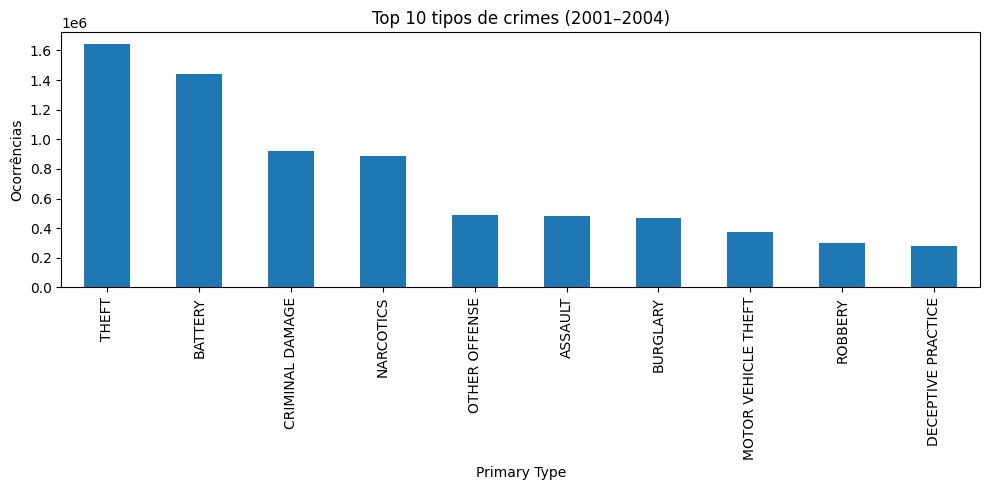

In [7]:
top_crimes = df['Primary Type'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_crimes.plot(kind='bar', title='Top 10 tipos de crimes (2001–2004)')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()

#### Crimes por hora

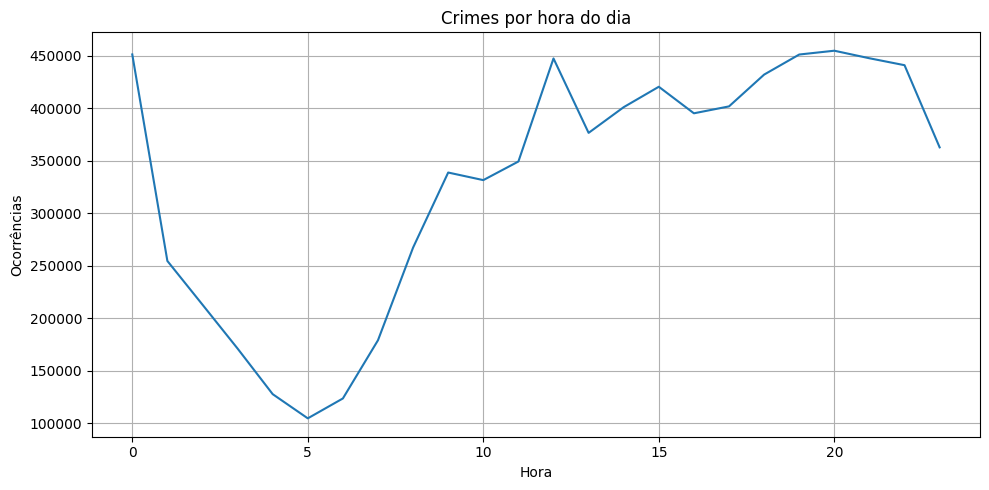

In [8]:
plt.figure(figsize=(10, 5))
df['Hour'].value_counts().sort_index().plot(kind='line', title='Crimes por hora do dia')
plt.xlabel('Hora')
plt.ylabel('Ocorrências')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Crimes por dia da semana

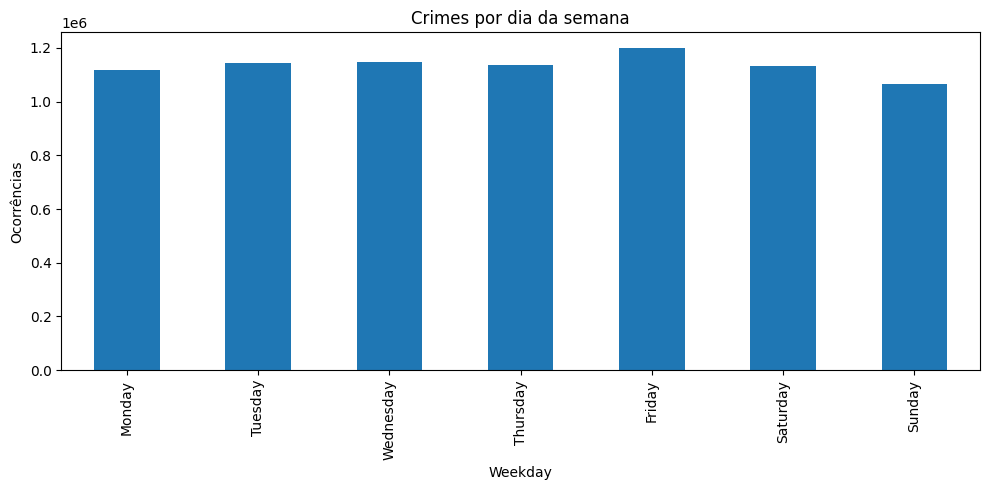

In [9]:
dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Weekday'], categories=dias, ordered=True)
plt.figure(figsize=(10, 5))
df['Weekday'].value_counts().sort_index().plot(kind='bar', title='Crimes por dia da semana')
plt.ylabel('Ocorrências')
plt.tight_layout()
plt.show()

#### Mapa de calor

In [10]:
map_data = df[['Latitude', 'Longitude']].dropna().sample(10000)
mapa = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
HeatMap(map_data.values.tolist()).add_to(mapa)
mapa